## Data620-Homework3

In this week homework we will load a graph database, create basic analysis of the graph, and display the graph.

### Data
We selected a database from  https://snap.stanford.edu/data/.  The database selected is: "Fine Foods" under the category "Online Review". This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plaintext review.

The file is finefoods.txt.gz and we will assume that it has been downloaded and "unzip".  Also, the file was open are saved with wordpad as foods2.txt to force the newline character to be interpreted properly.  

We data format is as follows: 

product/productId: B001E4KFG0  
review/userId: A3SGXH7AUHU8GW  
review/profileName: delmartian  
review/helpfulness: 1/1  
review/score: 5.0  
review/time: 1303862400  
review/summary: Good Quality Dog Food  
review/text: I have bought several of the Vitality canned dog food products and have  
found them all to be of good quality. The product looks more like a stew than a  
processed meat and it smells better. My Labrador is finicky and she appreciates this  
product better than most.

For the purpose of this assignment, we will load product, reviewer, and score as a graph.  Nodes will be products and reviewers, an edge will represent whether a product has been reviewed by a reviewer and the edge will be given a weigth indicated by the score.  

Because this data set is over 5000,000 reviews we will only load a limited number of records.  Each records contains 8 lines and are separated by line feed.  Hence a "record" consist of 9 lines.  We will make sure to load a multiple of 9 lines from text file.  

In [1]:
# set the number of lines to load, must be a multiple of 9
n_process=900
# load the file
with open("foods2.txt") as myfile:
    subset = [next(myfile) for x in xrange(n_process)]
myfile.close()

In [2]:
# function to extract appropriate information based on position in record
def process_line (line, l, case):
    """ This function is to process the content of line based on position in block;
        if pos = 0 mod 9 - process product id, 
        if pos = 1 mod 9 - process review id,
        if pos = 4 mod 9 - process rating,
        ignore all other position"""
    if case == 0:
        result = line[19:l-1]
    elif case == 1:
        result = line[15:l-1]
    elif case == 4:
        result = line[14:l-1]
    else:
        result = ''
    return result
    

In [3]:
# function to process all the lines that have been extracted from file and store in a list of tuples
def process_file (head, n):
    """ This function will read through all the lines and identify the block of data. 
        It will process each line and build a list of tuple to build graph"""
    g_list = []
    for x in range(n):
        line = subset[x]
        l=len(line)
        p = x%9
        if p == 0:
            product = process_line(line, l, p)
        if p == 1:
            reviewer = process_line(line, l, p)
        if p == 4:
            score_alpha = process_line(line, l, p)
            score = float(score_alpha)
        if p == 8:
            # build tuple (reviewer, product, rate) and add to list
            g_list.append((reviewer, product, score))
    return(g_list)

In [15]:
# call function is processed the extract from file and build the list of tuples
graph_list = process_file (subset, n_process)
reviewer_list = []
product_list = []

# we will also extract list of nodes=Products and list of nodes=Reviewers.  We will build a bipartite graph
for i in range(len(graph_list)):
    reviewer_list.append(graph_list[i][0])
    product_list.append(graph_list[i][1])


### Graph Building and Graph Analysis

We will now build the graph from the list of tuples.  The graph will be built and analysed using the Networkx package.

In [17]:
import networkx as nx
from networkx.algorithms import bipartite

%matplotlib inline
import matplotlib.pyplot as plt


In [20]:
# create and empty graph
bg=nx.Graph()

bg.add_nodes_from(reviewer_list, bipartite=0) 
bg.add_nodes_from(product_list, bipartite=1) 

# Build graph from list of tuples (product, reviewer, score)
bg.add_weighted_edges_from(graph_list)

In [21]:
# Sanity Checks
bg.number_of_edges()

100

From the data we loaded this is as we expected.  We will now draw the graph to have a visual understanding.  

C:\Users\vbrio\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\vbrio\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\vbrio\Anaconda2\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\vbrio\Anaconda2\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

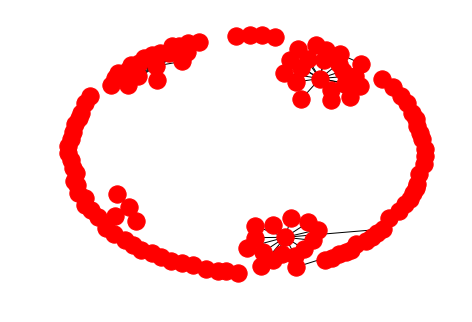

In [22]:
nx.draw(bg)

From the visual, we can see that we have a lot of isolated nodes with 3 or 4 cluster of highly connected nodes.  

We will now look at some basic information for the graph.  

In [31]:
print(nx.info(bg))
print('Graph density: ' + str(nx.density(bg)))
print('Is bipartite: ' + str(nx.is_bipartite(bg)))

Name: 
Type: Graph
Number of nodes: 128
Number of edges: 100
Average degree:   1.5625
Graph density: 0.0123031496063
Is bipartite: True


The density is a measure that indicates the number of edges divide by the number of possible edges.  It is a measure of how tightly a graph is connected.

We will now test whether the graph is connected in order to evaluate the diameter of the graph.  

In [32]:
print('Is connected: ' + str(nx.is_connected(bg)))

Is connected: False


Let us evaluate connected subgraphs and find the largest one for further analysis.     

In [70]:
cc = nx.connected_components(bg)
largest_c = max(cc, key=len)

sub_bg = bg.subgraph(largest_c)

nx.diameter(sub_bg)
    


2

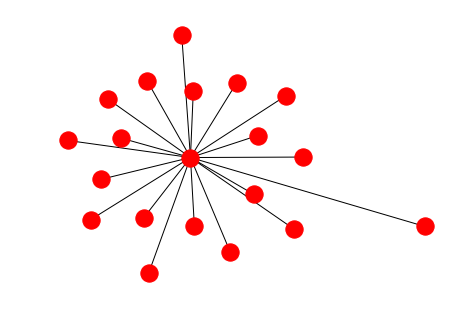

In [66]:
nx.draw(sub_bg)

Let us find the graph information for this subgraph.  

In [72]:
print(nx.info(sub_bg))
print('Graph density: ' + str(nx.density(sub_bg)))
print('Is bipartite: ' + str(nx.is_bipartite(sub_bg)))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 19
Average degree:   1.9000
Graph density: 0.1
Is bipartite: True


Let us now evaluate the Depth First Search transfersal for the subgraph.  

In [67]:
dfs_sub_bg = nx.traversal.dfs_edges(sub_bg)

In [69]:
list(dfs_sub_bg)

[('A276999Y6VRSCQ', 'B001EO5QW8'),
 ('B001EO5QW8', 'A3PMM0NFVEJGK9'),
 ('B001EO5QW8', 'A39Z97950MCTQE'),
 ('B001EO5QW8', 'A2CI0RLADCRKPF'),
 ('B001EO5QW8', 'AOVROBZ8BNTP7'),
 ('B001EO5QW8', 'A26AY1TFK8BQXQ'),
 ('B001EO5QW8', 'A108P30XVUFKXY'),
 ('B001EO5QW8', 'A2GHZ2UTV2B0CD'),
 ('B001EO5QW8', 'ALOR97KTZTK1P'),
 ('B001EO5QW8', 'A17DW6SUOC70DJ'),
 ('B001EO5QW8', 'AQLL2R1PPR46X'),
 ('B001EO5QW8', 'A1WK4ALVZDYPUE'),
 ('B001EO5QW8', 'AQCY5KRO7489S'),
 ('B001EO5QW8', 'A2G7B7FKP2O2PU'),
 ('B001EO5QW8', 'A16XFOYQSJREL7'),
 ('B001EO5QW8', 'A3MGP2E1ZZ6GRB'),
 ('B001EO5QW8', 'A2EB6OGOWCRU5H'),
 ('B001EO5QW8', 'A1MYS9LFFBIYKM'),
 ('B001EO5QW8', 'AO80AC8313NIZ')]

We will now prepare the subgraph to be imported into Gephi.

In [ ]:
nx.write_gml(sub_bg, 'food_subgraph.gml')

### Subgraph in Gephi

![Subgraph in Gephi](dephi_pic2.png)

### Link to video

[Presentation of findings](https://youtu.be/Tnf4jROXivk)